In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [62]:
raw_data = pd.read_csv("E:\project 6th sem\Malware dataset.csv")
raw_data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [63]:
raw_data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [64]:
raw_data.describe(include="all")

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000,100000.000000,100000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
unique,100,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,NaN,malware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,499.500000,NaN,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,NaN,288.676434,NaN,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,NaN,0.000000,NaN,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,NaN,249.750000,NaN,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,NaN,499.500000,NaN,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,NaN,749.250000,NaN,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0


In [65]:
# Check the DataType of our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [66]:
#Start Processing
data = raw_data

In [67]:
data["classification"].value_counts()


malware    50000
benign     50000
Name: classification, dtype: int64

In [68]:
data['classification'] = data.classification.map({'benign':0, 'malware':1})
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [69]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,com.modernenglishstudio.HowToSpeak.apk,226,0,61440,0,3069689856,30622,0,0,0,...,5,0,120,0,3204448256,401006,4,0,0,0
1,com.figure1.android.apk,157,0,0,0,3070103552,15117,0,0,0,...,32,1,120,5,3204448256,377738,3,1,0,0
2,com.king.candycrushsodasaga.apk,244,0,45056,0,3069190144,17137,0,0,0,...,0,1,120,0,3204448256,389862,5,0,0,0
3,com.sonypicturestelevision.sportsjeopardy.apk,780,0,0,0,3069784064,19573,0,0,0,...,172,1,120,2,3204448256,388109,4,5,0,0
4,4fd8fb06b479ae910df2e8806d3a6968a921c9cad596cc...,93,1,0,0,3069345792,14109,0,0,0,...,0,1,120,0,3204448256,371985,3,0,0,0


In [70]:
#Import drawing tools

import matplotlib.pyplot as plt

import seaborn as sns

In [71]:
data['classification'].value_counts()

0    50000
1    50000
Name: classification, dtype: int64

<AxesSubplot:xlabel='classification', ylabel='count'>

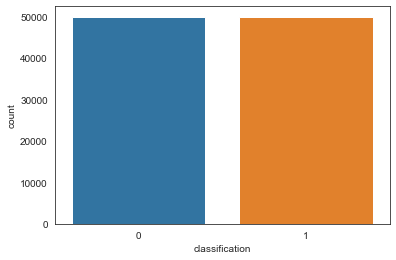

In [72]:
sns.countplot(x='classification',data=data)

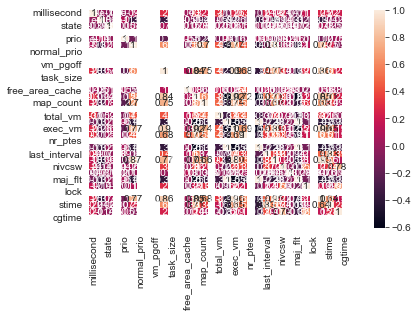

In [73]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [74]:
X = data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = data["classification"]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [76]:
# Data normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [77]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
import tensorflow as tf

In [79]:
import tensorflow as tf
#Number of attributes
input_size = 27

#Number of Outputs
output_size = 2

# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                1400      
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 50)                2550      
                                                                 
 dense_20 (Dense)            (None, 2)                

In [80]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#from keras.optimizers import SGD
#opt = SGD(lr=0.01)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [81]:
# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 20

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [82]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
                   #callbacks=[early_stopping],
                   validation_split=0.2)

Epoch 1/20


640/640 [==============================] - 3s 2ms/step - loss: 0.0829 - accuracy: 0.9666 - val_loss: 0.0060 - val_accuracy: 0.9986
Epoch 2/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0026 - val_accuracy: 0.9992
Epoch 3/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 4/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0017 - val_accuracy: 0.9990
Epoch 5/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 6/20
640/640 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 9.2456e-04 - val_accuracy: 0.9998
Epoch 7/20
640/640 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 8/20
64

C:\Users\Dell\AppData\Local\Temp\ipykernel_1056\1364437480.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
C:\Users\Dell\AppData\Local\Temp\ipykernel_1056\1364437480.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')


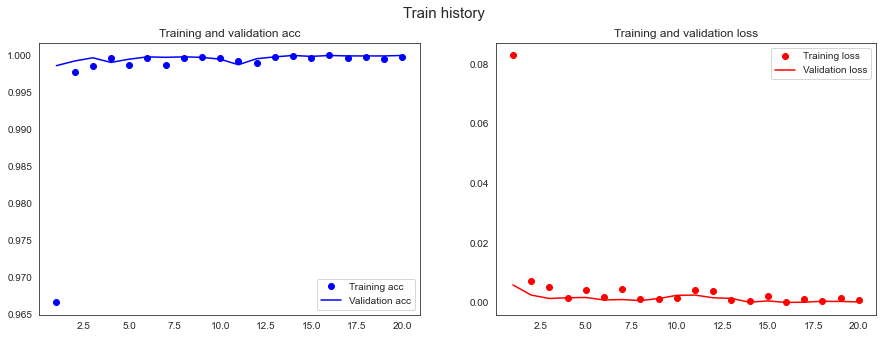

In [83]:
# Visualize the result
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "bo", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

In [84]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 4s 6ms/step - loss: 9.6441e-04 - accuracy: 0.9997

Test loss: 0.000964. Test accuracy: 99.965000%


In [85]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

ImportError: cannot import name 'SGD' from 'keras.optimizers' (c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers.py)

In [ ]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=10, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 11/30
640/640 [==============================] - 1s 2ms/step - loss: 8.7134e-07 - accuracy: 1.0000 - val_loss: 9.2719e-04 - val_accuracy: 0.9998
Epoch 12/30
640/640 [==============================] - 1s 2ms/step - loss: 5.3387e-07 - accuracy: 1.0000 - val_loss: 9.6122e-04 - val_accuracy: 0.9998
Epoch 13/30
640/640 [==============================] - 1s 2ms/step - loss: 3.5398e-07 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 0.9998


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 0.9998

Test loss: 0.001366. Test accuracy: 99.980003%
